<a href="https://colab.research.google.com/github/SuhyeonHa/MatrixComputation/blob/master/pattern_recognition_hw2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
########################################################################
## Pattern Recognition - HW2 (Problem 2)
## Chung-Ang University
## Lecturer: Jongwon Choi (The graduate school of advanced imaging science, multimedia & film)
##           email: choijw@cau.ac.kr
########################################################################

# DO NOT USE ANY ADDITIONAL LIBRARY
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


In [0]:
###################
##   NOISY DATA  ##
###################
def dataReset():
  np.random.seed(0)
  SIZE_CLUSTER = [200, 300, 400, 500, 600]
  CETNER_CLUSTER = 5*np.random.randn(len(SIZE_CLUSTER), 2)
  SIGMA_CLUSTER = np.random.uniform(0.5, 2.0, len(SIZE_CLUSTER))

  for i in range(len(SIZE_CLUSTER)):
    if i == 0:
      feature = (np.random.randn(SIZE_CLUSTER[i], 2) + CETNER_CLUSTER[i, :])*SIGMA_CLUSTER[i]
    else:
      feature = np.concatenate( (feature, (np.random.randn(SIZE_CLUSTER[i], 2) + CETNER_CLUSTER[i, :])*SIGMA_CLUSTER[i]) )
  feature = np.random.permutation(feature)

  # Plot the samples
  f, ax = plt.subplots(1, figsize=(10, 10))
  ax.scatter(feature[:, 0], feature[:, 1])
  f.show()

In [51]:
#############################################################
## Problem 1 - A : Fill in the following 2 variables according to the results of your program!
k = 3 # Among {3, 5, 7}
centroids = np.zeros([k, 2]) # centroids of k clusters
cluster_index = np.zeros(np.sum(SIZE_CLUSTER)) # cluster index (0~(k-1)) for each sample

############################################################
## Your implementation
SIZE_FEATURE = len(feature)
feature.shape

(2000, 2)

In [0]:
def dist(point1, point2): # distance between two points
  x1 = point1[0]
  y1 = point1[1]
  x2 = point2[0]
  y2 = point2[1]
  temp = (x2 - x1)**2+(y2 - y1)**2
  result = temp**0.5
  # print(result)
  return result

In [0]:
def kmeans(k = 3):
  centroids = np.zeros([k, 2])
  clusters = []
  samples = []
  iteration = 500 # termination iteration

  # create k cluster
  for i in range(k):
    clusters.append(list())

  # randomly select k samples
  sample_index = np.random.choice(SIZE_FEATURE, k, replace=False)
  for i in range(k):
    samples.append(feature[sample_index[i]])
    cluster_index[sample_index[i]] = i
    # print(cluster_index[sample_index[i]])

  # assign centroids with first samples
  for i in range(k):
    centroids[i] = np.array(samples[i])
  # print(centroids)

  # repeat
  for itr in range(iteration):
    # assign samples to closest cluster
    for i in range(SIZE_FEATURE):
      min_dist = 999
      change_cnt = 0
      for j in range(k):
        temp_dist = dist(centroids[j], feature[i])
        if temp_dist < min_dist:
          change_cnt = change_cnt + 1
          cluster_index[i] = j
          min_dist = temp_dist

    if change_cnt == k: # stop if no changes (k is # first assignment)
      print(itr)
      break

    # update means
    for j in range(k):
      filtered_x = []
      filtered_y = []
      for i in range(SIZE_FEATURE):
        if cluster_index[i] == j:
          filtered_x.append(feature[i][0])
          filtered_y.append(feature[i][1])
      mean_x = np.mean(filtered_x)
      mean_y = np.mean(filtered_y)
      centroids[j][0] = mean_x
      centroids[j][1] = mean_y

  # Plot the samples
  f, ax = plt.subplots(1, figsize=(10, 10))
  for i in range(k):
    ax.scatter(feature[cluster_index==i, 0], feature[cluster_index==i, 1]) #cluster scatter
  for i in range(k):
    ax.plot(centroids[i,0], centroids[i,1], 'ro') #centroid point (red point)

  f.show()

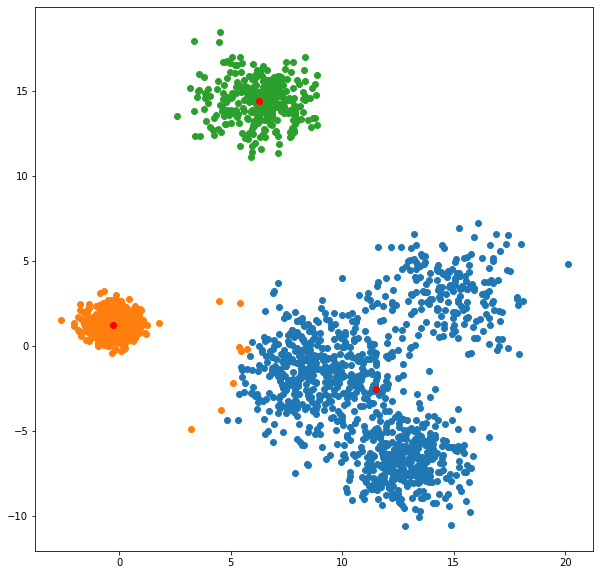

In [59]:
# Test the program with k = 3, 5, 7
dataReset
kmeans(k = 3)

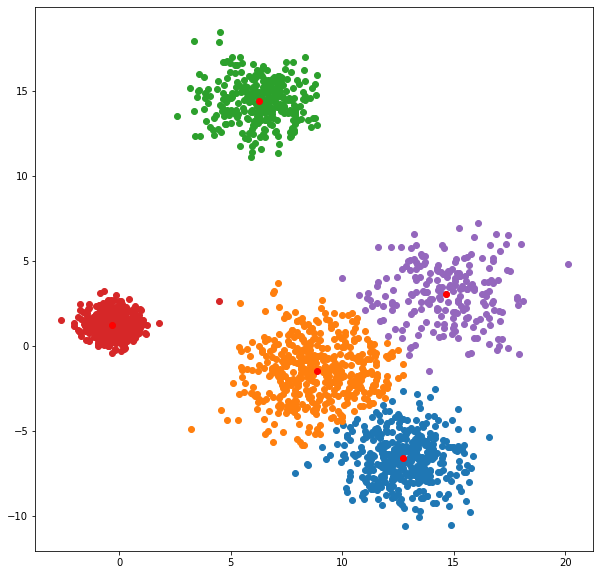

In [60]:
dataReset
kmeans(k = 5)

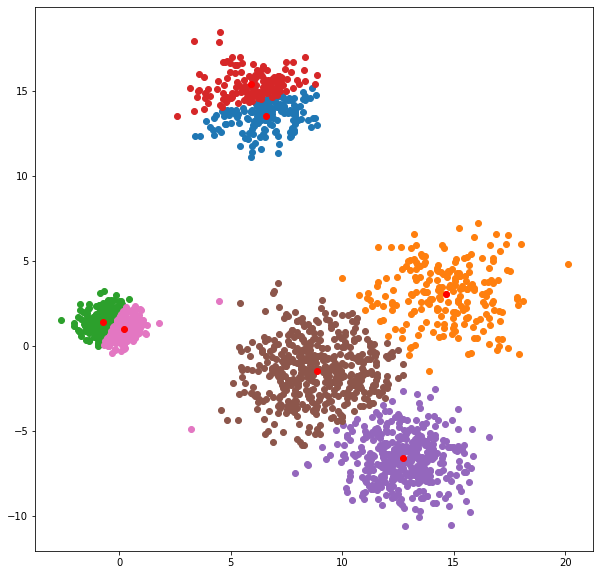

In [61]:
dataReset
kmeans(k = 7)

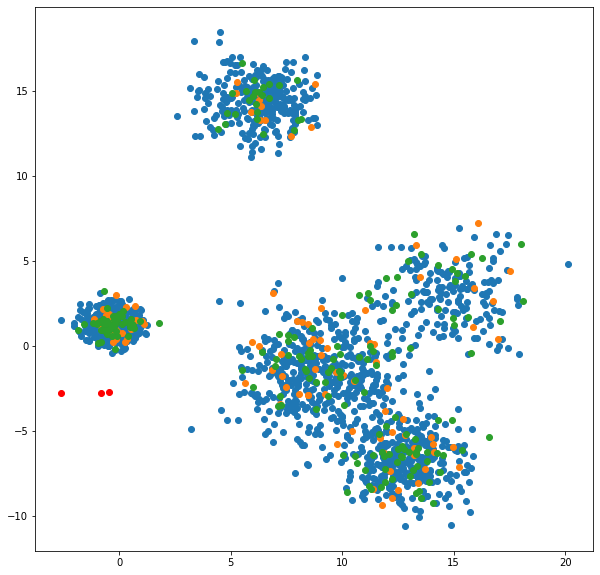

In [0]:
#############################################################
## Problem 1 - B : Fill in the following 2 variables according to the results of your program!
k = 3 # Among {3, 5, 7}
centroids = np.zeros([k, 2]) # centroids of k clusters
cluster_index = np.zeros(np.sum(SIZE_CLUSTER)) # cluster index (0~(k-1)) for each sample

############################################################
## Your implementation

#Example of your results
centroids = 3*np.random.randn(k,2)
cluster_index[:100] = 1
cluster_index[100:300] = 2

############################################################

# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 10))
for i in range(k):
  ax.scatter(feature[cluster_index==i, 0], feature[cluster_index==i, 1]) #cluster scatter
for i in range(k):
  ax.plot(centroids[i,0], centroids[i,1], 'ro') #centroid point (red point)

f.show()